In [ ]:
%cd ../

/Users/sumishunsuke/Desktop/RNA/response_of_RF00162/rfamgen


In [7]:

cmd = f"""
python scripts/get_tidy_sequences_from_fasta_rfam.py \
    --seed_file datasets/Rfam.seed \
    --rfam RF00162 \
    --output_dir datasets/RF00162 \
    --cpu 1
    """

import subprocess
res = subprocess.run(cmd, shell=True, capture_output=True)
print(res.stdout.decode())
print(res.stderr.decode())

Total number		:  6161
After uniquenize	:  6046
created datasets/RF00162/RF00162_unique.fa
seed_seq		: 456
all_seq 		: 5905
full_seq - seed_seq	: 5445




In [10]:
rfam = "RF00162"
cmd = f"""
    python scripts/make_onehot_from_traceback.py \
        --fasta datasets/{rfam}/{rfam}_unique_seed_removed.fa \
        --cmfile datasets/{rfam}/{rfam}.cm \
        --cpu 1
"""


res = subprocess.run(cmd, shell=True, capture_output=True)
print(res.stdout.decode())
print(res.stderr.decode())

cmalign --cpu 1   --notrunc  --sfile datasets/RF00162/RF00162_unique_seed_removed_notrunc_score.txt --tfile datasets/RF00162/RF00162_unique_seed_removed_notrunc_traceback.txt --ifile datasets/RF00162/RF00162_unique_seed_removed_notrunc_insertion.txt --elfile datasets/RF00162/RF00162_unique_seed_removed_notrunc_ELstate.txt datasets/RF00162/RF00162.cm datasets/RF00162/RF00162_unique_seed_removed.fa > datasets/RF00162/RF00162_unique_seed_removed_notrunc_tmp.sto
gzip datasets/RF00162/RF00162_unique_seed_removed_notrunc_traceback.txt
esl-reformat --informat stockholm -o datasets/RF00162/RF00162_unique_seed_removed_notrunc.sto stockholm datasets/RF00162/RF00162_unique_seed_removed_notrunc_tmp.sto
Reformated the stockhoml file by Bio.AlignIO.

Loading datasets/RF00162/RF00162_unique_seed_removed_notrunc_traceback.txt.gz.
Start reading datasets/RF00162/RF00162_unique_seed_removed_notrunc_traceback.txt.gz...
Start making tbtext
Start making tbdict
Start writing datasets/RF00162/RF00162_unique_s

In [11]:
cmd = f"""
    python scripts/split_onehot_train_valid_test.py \
        -i datasets/{rfam}/{rfam}_unique_seed_removed_notrunc_traceback_onehot_cm.h5 \
        --train_ratio 0.7 \
        --random_state 42
    """


res = subprocess.run(cmd, shell=True, capture_output=True)
print(res.stdout.decode())
print(res.stderr.decode())

Splited into datasets/RF00162/RF00162_unique_seed_removed_notrunc_traceback_onehot_cm_(train|valid|test).h5




In [13]:
!python scripts/generate_weight.py --mode cm -i datasets/{rfam}/{rfam}_unique_seed_removed_notrunc_traceback_onehot_cm_train.h5 --threshold 0.1
!python scripts/generate_weight.py --mode cm -i datasets/{rfam}/{rfam}_unique_seed_removed_notrunc_traceback_onehot_cm_valid.h5 --threshold 0.1

Infile		: datasets/RF00162/RF00162_unique_seed_removed_notrunc_traceback_onehot_cm_train.h5
mode		: cm
n_samples	: inf
print_every	: 500
Outfile		: datasets/RF00162/RF00162_unique_seed_removed_notrunc_traceback_onehot_cm_train_weight_threshold0p1.h5
Threshold	: 0.1
N_CORE	: 8
**************************************************
CM mode.
Sampled size: 3811
N_COLUMNS: 338
**************************************************
0/3811	, sampling 3811, estimated remaining time: 2.1335437421798704 sec.
500/3811	, sampling 3811, estimated remaining time: 922.9551971883774 sec.
1000/3811	, sampling 3811, estimated remaining time: 785.0239956922532 sec.
1500/3811	, sampling 3811, estimated remaining time: 644.3421582717896 sec.
2000/3811	, sampling 3811, estimated remaining time: 500.6566404628754 sec.
2500/3811	, sampling 3811, estimated remaining time: 362.2512124300003 sec.
3000/3811	, sampling 3811, estimated remaining time: 230.24549996185303 sec.
3500/3811	, sampling 3811, estimated remaining t

In [19]:

cmd = f"""python scripts/train.py \
    --data_dir datasets/{rfam} \
    --X_train {rfam}_unique_seed_removed_notrunc_traceback_onehot_cm_train.h5 \
    --w_train {rfam}_unique_seed_removed_notrunc_traceback_onehot_cm_train_weight_threshold0p1.h5 \
    --X_valid {rfam}_unique_seed_removed_notrunc_traceback_onehot_cm_valid.h5 \
    --w_valid {rfam}_unique_seed_removed_notrunc_traceback_onehot_cm_valid_weight_threshold0p1.h5 \
    --epoch 100 \
    --beta 1e-3 --use_anneal --use_early_stopping \
    --log --log_dir ./outputs/{rfam} --save_ckpt --ckpt_iter 5 \
    --print_every 300
"""

# !{cmd} 2>/dev/null

{'ANNEAL_RATE': 1,
 'ANNEAL_SATURATE_RATE': 0.4,
 'BATCH_SIZE': 8,
 'BETA': 0.001,
 'BETS_SUM': 0.008,
 'CH1': 5,
 'CH2': 5,
 'CH3': 8,
 'CKPT_ITER': 5,
 'CLIP': 20,
 'DATA_DIR': 'datasets/RF00162',
 'EARLY_STOPPING': True,
 'EARLY_STOPPING_THRESHOLD': 3,
 'EPOCH': 100,
 'HIDDEN': 128,
 'KER1': 5,
 'KER2': 5,
 'KER3': 7,
 'LEARNING_RATE': 0.001,
 'LOG': True,
 'LOG_DIR': './outputs/RF00162',
 'ONLY_TRAINING': False,
 'PRINT_EVERY': 300,
 'P_WIDE': 33,
 'STRIDE': 1,
 'SUFFIX': '',
 'S_WIDE': 220,
 'TR_WIDE': 85,
 'USE_ANNEAL': True,
 'W_TRAIN': 'RF00162_unique_seed_removed_notrunc_traceback_onehot_cm_train_weight_threshold0p1.h5',
 'W_VALID': 'RF00162_unique_seed_removed_notrunc_traceback_onehot_cm_valid_weight_threshold0p1.h5',
 'X_TRAIN': 'RF00162_unique_seed_removed_notrunc_traceback_onehot_cm_train.h5',
 'X_VALID': 'RF00162_unique_seed_removed_notrunc_traceback_onehot_cm_valid.h5',
 'Z_DIM': 16}
----------------------------------------------------------------------------------------

In [24]:
cmd = f"""
    python scripts/sampling_from_gauss.py \
        --config ./outputs/{rfam}/config.yaml \
        --ckpt ./outputs/{rfam}/model_epoch60.pt \
        --cmfile ./datasets/{rfam}/{rfam}.cm \
        --outfasta ./outputs/{rfam}/sampled_5000seq_epoch60.fa \
        --n_samples 5000
    """

!{cmd}

torch.cuda.is_available:  False
Start loading cm dict. This process may take much time for long sequences.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250

In [25]:
cmd = f"""
    python ./scripts/run_cmalign.py \
    --fasta ./outputs/{rfam}/sampled_5000seq_epoch60.fa \
    --cmfile ./datasets/{rfam}/{rfam}.cm \
    --cpu 6
"""

!{cmd}

cmalign --cpu 6   --notrunc  --sfile ./outputs/RF00162/sampled_5000seq_epoch60_notrunc_score.txt --tfile ./outputs/RF00162/sampled_5000seq_epoch60_notrunc_traceback.txt --ifile ./outputs/RF00162/sampled_5000seq_epoch60_notrunc_insertion.txt --elfile ./outputs/RF00162/sampled_5000seq_epoch60_notrunc_ELstate.txt ./datasets/RF00162/RF00162.cm ./outputs/RF00162/sampled_5000seq_epoch60.fa > ./outputs/RF00162/sampled_5000seq_epoch60_notrunc_tmp.sto
gzip ./outputs/RF00162/sampled_5000seq_epoch60_notrunc_traceback.txt
esl-reformat --informat stockholm -o ./outputs/RF00162/sampled_5000seq_epoch60_notrunc.sto stockholm ./outputs/RF00162/sampled_5000seq_epoch60_notrunc_tmp.sto
Reformated the stockhoml file by Bio.AlignIO.



In [6]:
import os
from Bio import SeqIO
from sklearn.model_selection import train_test_split
rfam = "RF00162"

def split_fasta_train_test_valid(fasta, train_size = 0.7):
    """
    split fasta file to train_ratio : (1-train_ratio)/2 : (1-train_ratio)/2.
    and save at save_dir.
    """

    dict_seq = dict()
    with open(fasta, "r") as f:
        for seq_record in SeqIO.parse(f, "fasta"):
            if not str(seq_record.id) in dict_seq:
                dict_seq[str(seq_record.id)] = str(seq_record.seq)

    ID_train, ID_test_valid = train_test_split(list(dict_seq.keys()), train_size=train_size)
    ID_test, ID_valid       = train_test_split(ID_test_valid, train_size=0.5)
    dir_name, filename      = os.path.split(fasta)
    train_file              = os.path.join(dir_name, "train", "train_"+filename)
    test_file               = os.path.join(dir_name, "test", "test_"+filename)
    valid_file              = os.path.join(dir_name, "valid", "valid_"+filename)

    with open(fasta, "r") as f:
        with open(train_file, "w") as train, open(test_file, "w") as test, open(valid_file, "w") as valid:
            for record in SeqIO.parse(f, "fasta"):
                if str(record.id) in ID_train:
                    train.write(">" + str(record.description) + "\n")
                    train.write(str(record.seq)[:int(len(record.seq)/2)]+"\n")
                elif str(record.id) in ID_test:
                    test.write(">" + str(record.description) + "\n")
                    test.write(str(record.seq)[:int(len(record.seq)/2)]+"\n")
                else:
                    valid.write(">" + str(record.description) + "\n")
                    valid.write(str(record.seq)[:int(len(record.seq)/2)]+"\n")

    return print(f"split {fasta} to {train_file} and {test_file} and {valid_file}")


split_fasta_train_test_valid(
    fasta = f"./datasets/{rfam}/RF00162_unique_seed_removed.fa",
    train_size=0.7
)

split ./datasets/RF00162/RF00162_unique_seed_removed.fa to ./datasets/RF00162/train/train_RF00162_unique_seed_removed.fa and ./datasets/RF00162/test/test_RF00162_unique_seed_removed.fa and ./datasets/RF00162/valid/valid_RF00162_unique_seed_removed.fa


In [8]:
cmd = f"""
    python ./scripts/run_cmalign.py \
    --fasta ./datasets/{rfam}/test/test_RF00162_unique_seed_removed.fa \
    --cmfile ./datasets/{rfam}/{rfam}.cm \
    --cpu 6
"""

!{cmd}

cmalign --cpu 6   --notrunc  --sfile ./datasets/RF00162/test/test_RF00162_unique_seed_removed_notrunc_score.txt --tfile ./datasets/RF00162/test/test_RF00162_unique_seed_removed_notrunc_traceback.txt --ifile ./datasets/RF00162/test/test_RF00162_unique_seed_removed_notrunc_insertion.txt --elfile ./datasets/RF00162/test/test_RF00162_unique_seed_removed_notrunc_ELstate.txt ./datasets/RF00162/RF00162.cm ./datasets/RF00162/test/test_RF00162_unique_seed_removed.fa > ./datasets/RF00162/test/test_RF00162_unique_seed_removed_notrunc_tmp.sto
gzip ./datasets/RF00162/test/test_RF00162_unique_seed_removed_notrunc_traceback.txt
esl-reformat --informat stockholm -o ./datasets/RF00162/test/test_RF00162_unique_seed_removed_notrunc.sto stockholm ./datasets/RF00162/test/test_RF00162_unique_seed_removed_notrunc_tmp.sto
Reformated the stockhoml file by Bio.AlignIO.



In [15]:
%cd ~/Desktop/RNA/response_of_RF00162/rfamgen

import sys
sys.path.append("./src")
from metric_helper.cmalign_tools import score_parser

res_gen = score_parser(f"./outputs/{rfam}/sampled_5000seq_epoch60_notrunc_score.txt")
res_test = score_parser(f"./datasets/{rfam}/test/test_RF00162_unique_seed_removed_notrunc_score.txt")

/Users/sumishunsuke/Desktop/RNA/response_of_RF00162/rfamgen


Text(0, 0.5, 'Density')

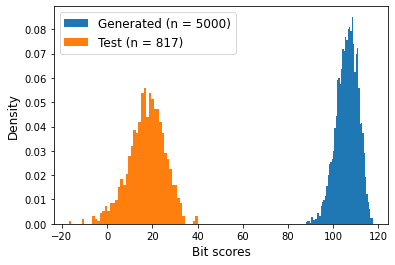

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
n_bins = 50
n_gen = len(res_gen)
n_test = len(res_test)

plt.hist(res_gen.values(), bins=n_bins, label=f'Generated (n = {n_gen})' ,density=True)
plt.hist(res_test.values(), bins=n_bins, label=f'Test (n = {n_test})', density=True)
plt.legend(fontsize=12)
plt.xlabel("Bit scores", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.savefig(f"./outputs/{rfam}/bit_score_hist.png")